In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from main.utils import load_experiment, load_experiments, set_style

%reload_ext autoreload
%autoreload 2

In [2]:
set_style()

In [4]:
# naming of methods
method_names = {
    'badge': 'BADGE',
    'random': 'Random',
    'entropy': 'Entropy',
    'bald': 'Top-K BALD',
    'max_logdet_S': 'Similarity LogDet',
    'similarity_kmeans': 'Similarity K-Means',
}

# naming of datasets
dataset_names = {
    'mnist': 'MNIST',
    'fashion_mnist': 'Fashion-MNIST',
    'dirty_mnist': 'Dirty-MNIST',
    'repeated_mnist': 'Repeated-MNIST',
    'imagenet': 'ImageNet',
}

## small dataset

KeyError: 'empirical_covariance'

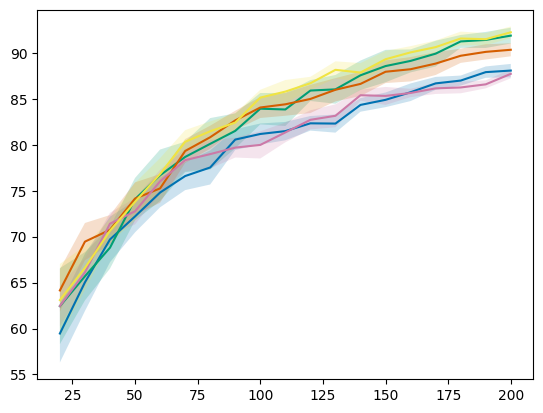

In [5]:
dataset = 'mnist'
batch_size = 10

seeds = 10
random_ids = [f'random_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
entropy_ids = [f'entropy_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
bald_ids = [f'bald_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
max_logdet_S_ids = [f'max_logdet_S_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
badge_ids = [f'badge_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
empcov_ids = [f'empirical_covariance_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
sim_kmeans_ids = [f'similarity_kmeans_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
id_list = [random_ids, entropy_ids, bald_ids, badge_ids, max_logdet_S_ids, empcov_ids, sim_kmeans_ids]

for i, method in enumerate(id_list):
    results = load_experiments(method, base_dir='experiments' if dataset != 'dirty_mnist' else 'experiments_dirty_mnist_10')
    #results = load_experiments(method, base_dir='experiments_batch20')
    accuracies = np.array([result[1]['test_accs'] for result in results])

    batch_sizes = np.linspace(20, 200, accuracies.shape[1])
    std = np.std(accuracies, axis=0) / np.sqrt(10)
    mean = np.mean(accuracies, axis=0)
    plt.plot(batch_sizes, mean, label=method_names[results[0][0].al_method]) #, color=colors[i])
    plt.fill_between(batch_sizes, mean - 1.96*std, mean + 1.96*std, alpha=0.2, label='_nolegend_') #, color=colors[i])

plt.legend()
plt.xlabel('Number of labeled samples')
plt.ylabel('Accuracy (%)')
# add horizontal lines background
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.title(f'{dataset_names[dataset]}')

## Side by side


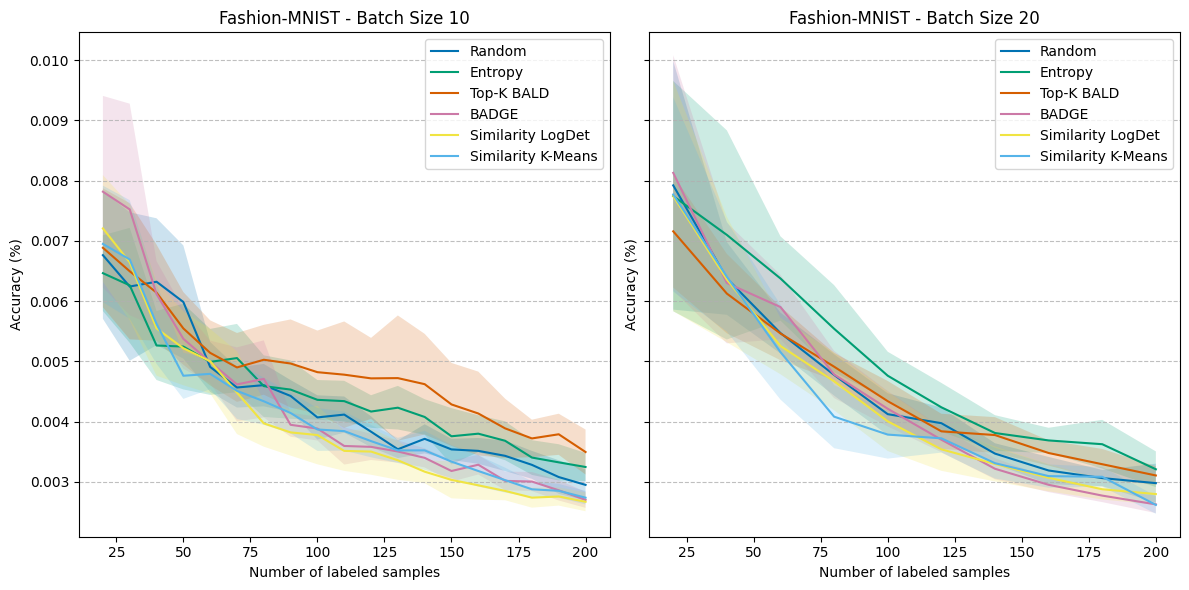

In [54]:
# Function to plot results for a given batch size
def plot_results(batch_size, ax, dataset):
    seeds = 10
    random_ids = [f'random_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
    entropy_ids = [f'entropy_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
    bald_ids = [f'bald_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
    max_logdet_S_ids = [f'max_logdet_S_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
    badge_ids = [f'badge_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
    empcov_ids = [f'empirical_covariance_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
    sim_kmeans_ids = [f'similarity_kmeans_{dataset}_20_to_200_B={batch_size}_' + str(1+i) for i in range(seeds)]
    id_list = [random_ids, entropy_ids, bald_ids, badge_ids, max_logdet_S_ids, sim_kmeans_ids]

    for i, method in enumerate(id_list):
        base_dir='experiments' if batch_size == 10 else 'experiments_batch20'
        if dataset == 'dirty_mnist' and batch_size == 10:
            base_dir = 'experiments_dirty_mnist_10'

        results = load_experiments(method, base_dir=base_dir)
        
        accuracies = np.array([result[1]['test_accs'] for result in results])
        
        batch_sizes = np.linspace(20, 200, accuracies.shape[1])
        std = np.std(accuracies, axis=0) / np.sqrt(10)
        mean = np.mean(accuracies, axis=0)

        ax.plot(batch_sizes, mean, label=method_names[results[0][0].al_method])
        ax.fill_between(batch_sizes, mean - 1.96*std, mean + 1.96*std, alpha=0.2)

    ax.legend()
    ax.set_xlabel('Number of labeled samples')
    ax.set_ylabel('Accuracy (%)')
    ax.grid(axis='y', linestyle='--', alpha=0.8)
    ax.set_title(f'{dataset_names[dataset]} - Batch Size {batch_size}')

dataset = 'fashion_mnist'

# Create figure and axes for two side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for batch_size = 10
plot_results(batch_size=10, ax=axs[0], dataset=dataset)

# Plot for batch_size = 20
plot_results(batch_size=20, ax=axs[1], dataset=dataset)

# Adjust layout and display
plt.tight_layout()
plt.savefig(f'loss_plot{dataset}_batch_size_comparison.png', dpi=500, bbox_inches='tight')